In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import time 
import csv

In [2]:
data = pd.read_csv("../data/default of credit card clients.csv", header = 1)

In [3]:
pd.set_option('display.max_columns', 1000)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.rename(columns={"PAY_0" : "PAY_1"}, inplace = True)
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
def is_shifted(list_1,list_2,length):
    for i in range(1,length):
        if list_1[i-1]!=list_2[i]:
            return False
    return True

In [49]:

find_shifts = False
if find_shifts:
    age_dict = {i : [] for i in range(100)}
    for index, row in data.sort_values(by=['AGE']).iterrows():
        age_dict[row["AGE"]].append(index)
    
    problem_pairs = []
    start_time = time.time()
    for age in range(100):
        for  index in age_dict[age]:
            row = data.iloc[index]
            current_row_1 = list(row[["PAY_{}".format(i) for i in range(1,7)]])
            current_row_2 = list(row[["BILL_AMT{}".format(i) for i in range(1,7)]])
            current_row_3 = list(row[["PAY_AMT{}".format(i) for i in range(1,7)]])
            demo_row = list(row[[ "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]])
            length = 6
            for index_1 in age_dict[age]:
                row_1 = data.iloc[index_1]
                demo_row_1 = list(row_1[[ "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE"]])
                if index_1 != index and demo_row == demo_row_1:
                    comp_row_1 = list(row_1[["PAY_{}".format(i) for i in range(1,7)]])
                    comp_row_2 = list(row_1[["BILL_AMT{}".format(i) for i in range(1,7)]])
                    comp_row_3 = list(row_1[["PAY_AMT{}".format(i) for i in range(1,7)]])
                    if is_shifted(current_row_1, comp_row_1, 6) and is_shifted(current_row_2, comp_row_2, 6) and is_shifted(current_row_3, comp_row_3, 6):
                        problem_pairs.append((index,index_1))
        print("finished checking: ", age)
    finish_time = time.time()
    print("checking pairs completed")
    print("computation time (in sec): ", finish_time-start_time)
    print("there are {} problem pairs".format(len(problem_pairs)))

    with open("../data/shifted_pairs.csv", "w") as file:
        writer = csv.writer(file)
        for pair in problem_pairs:
            writer.writerow(list(pair))
else:
    with open("../data/shifted_pairs.csv", newline='') as file:
        reader = csv.reader(file)
        problem_pairs = list(reader)
    for index, pair in enumerate(problem_pairs):
        problem_pairs[index] = [int(pair[0]),int(pair[1])]

In [8]:
# here is some code trying to pick out exactly the rows from the kaggle comment
df = data[data["AGE"] == 35]
df = df[df["LIMIT_BAL"] == 150000]
df = df[df["SEX"] == 1]
df = df[df["EDUCATION"]== 1]
df[df["MARRIAGE"] == 1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
7132,7133,150000,1,1,1,35,0,0,0,0,0,0,160292,153981,129725,103050,54447,46943,6100,5100,4200,1900,1600,1500,1
15711,15712,150000,1,1,1,35,-2,-2,-2,-2,-2,-2,5819,805,-48,8029,2188,9157,809,0,8077,2199,9202,2112,0
27127,27128,150000,1,1,1,35,-1,-1,-1,-1,-1,-1,18786,6879,16643,4869,9157,9624,6879,16701,4883,9199,9652,443,0
29827,29828,150000,1,1,1,35,2,0,0,0,0,0,165441,160292,153981,129725,103050,54447,7300,6100,5100,4200,1900,1600,1


# Information about the data

<Axes: xlabel='default payment next month', ylabel='count'>

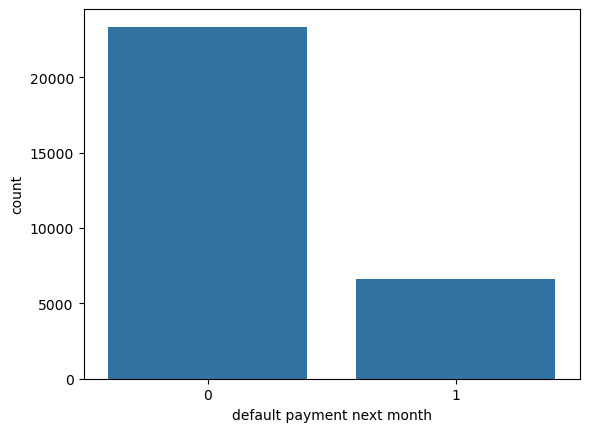

In [9]:
sns.barplot(data= data["default payment next month"].value_counts())

<Axes: xlabel='SEX', ylabel='count'>

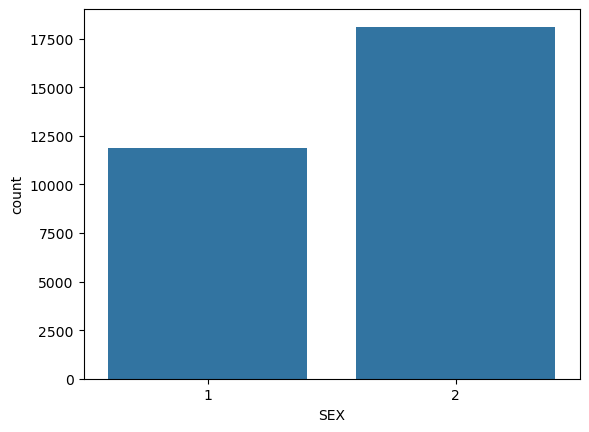

In [10]:
sns.barplot(data= data["SEX"].value_counts())

<Axes: xlabel='EDUCATION', ylabel='count'>

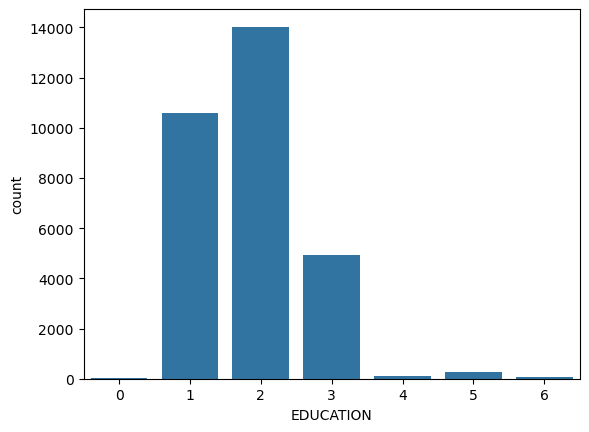

In [11]:
sns.barplot(data= data["EDUCATION"].value_counts())

The documentation for the education data only defines what the values 1 through 4 are coded as. Additionally, there are not a lot of rows for value 4, so it may be prudent to remove these data points from the data set. 

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

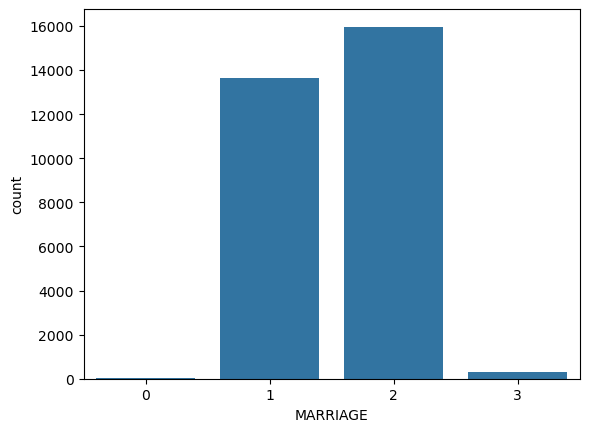

In [12]:
sns.barplot(data= data["MARRIAGE"].value_counts())
data["MARRIAGE"].value_counts()

## Checking Entries 
Here we check some of the data entries to make sure they make sense. For example, the ages of credit card clients should be between 18 and 100.

In [13]:
print("all ages are less than 100: ",(data["AGE"]<100).all())
print("all ages are greater than 17: ", (data["AGE"]>17).all())

all ages are less than 100:  True
all ages are greater than 17:  True


The documentation for the 'Pay_X' entries states that this is the number of months since an on-time payment. For example, a value of 1 means that the client is made an on-time payment for 1 consecutive month. The value -1 is used to code on-time payments, and 0, -2 lack any documentation. The documentation suggests that the correct range of values is -1 to 9, while the data contains -2 and 8 as minimum and maximum values. 

In [14]:
print("maximum entry in 'PAY_X' is: ", data[["PAY_{}".format(i) for i in range(1,7)]].values.max()) 
print("minimum entry in 'PAY_X' is: ", data[["PAY_{}".format(i) for i in range(1,7)]].values.min()) 

maximum entry in 'PAY_X' is:  8
minimum entry in 'PAY_X' is:  -2


## Data Cleaning
Here are the data cleaning tasks:
- maybe change pay_0 to pay_1 (completed in cell 4)
- one hot encoding of sex 
- education: 0,4,5,6 should be combined into a single category
- marriage: has value 0 which is coded as other, while 1,2,3 are married, single, and divorced.
- we need to split "PAY_X" values apart: -2,1,0 are categorical, the month delays are integer values (and comparable)

In [15]:

# combine 0,4,5,6 into category 4 in EDUCATION
data["EDUCATION"] = data["EDUCATION"].replace(to_replace = {0 : 4, 5 : 4, 6 : 4})

# one hot encoding of SEX, MARRIAGE, EDUCATION
data = pd.get_dummies(data,columns = ["SEX","MARRIAGE", "EDUCATION"])

#split off categorical values for PAY_X
#replace -2,-1,0 with 0 in PAY_X to make a scale
name_dict = {-2: "inactive",  -1: "paid_in_full", 0:"revolving"}
for PAY in ["PAY_{}".format(i) for i in range(1,7)]:
    for value in [-2,-1,0]:
        data[PAY+"_"+name_dict[value]] = data[PAY] == value
    data[PAY] = data[PAY].replace(to_replace = {-2: 0, -1 : 0, 0 : 0})

In [16]:
data

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_1,SEX_2,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,PAY_1_inactive,PAY_1_paid_in_full,PAY_1_revolving,PAY_2_inactive,PAY_2_paid_in_full,PAY_2_revolving,PAY_3_inactive,PAY_3_paid_in_full,PAY_3_revolving,PAY_4_inactive,PAY_4_paid_in_full,PAY_4_revolving,PAY_5_inactive,PAY_5_paid_in_full,PAY_5_revolving,PAY_6_inactive,PAY_6_paid_in_full,PAY_6_revolving
0,1,20000,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False
1,2,120000,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False
2,3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
3,4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
4,5,50000,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
29996,29997,150000,43,0,0,0,0,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True
29997,29998,30000,37,4,3,2,0,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
29998,29999,80000,41,1,0,0,0,0,0,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False


We can see that there are a number of PAY_X sequences that do not make sense (iloc: 0,1,29997) because there is a jump in the number of months of a payment delay. Lets see how many errors like this we can find. 

In [17]:
# this funciton will test a sequence of integers to make sure that no increase from right to left is greater than 1.

def is_problem_sequence(seq):
    for i in range(5):
        if seq[i] > seq[i+1] +1:
            return True, seq[i], i+2
    return False, None, None

In [18]:
problem_sequences = []
start_time = time.time()
for  index, row in data.iterrows():
    seq = list(row[["PAY_{}".format(i) for i in range(1,7)]])
    condition, value, fail_index=is_problem_sequence(seq)
    if condition:
        is_revolving = False
        if row["PAY_{}_revolving".format(fail_index)] == True:
            is_revolving = True
        problem_sequences.append((index,value, is_revolving))
finish_time = time.time()
print("checking sequences completed")
print("computation time (in sec): ", finish_time-start_time)
print("there are {} problem sequences".format(len(problem_sequences)))

checking sequences completed
computation time (in sec):  6.7680442333221436
there are 5948 problem sequences


In [19]:
print("jumps in PAY_X sequence involve the values: ", set([x[1] for x in problem_sequences]))
print("jumps in PAY_X are preceded by the following revolving statues: ", set([x[2] for x in problem_sequences]))

jumps in PAY_X sequence involve the values:  {2}
jumps in PAY_X are preceded by the following revolving statues:  {False, True}


It appears that the first problem in any problem sequence is a jump from 0 to 2. This could potentially be explained by how revolving balances are counted at banks. For exmaple, making a minimum payment means you are revolving. However, this does not work every time. 

## Feature Engineering

We want to add the following features:
- (Cumulative Balance) / (Credit Limit)
- (Bill Payed) / (Bill Amount); note that this is relative to the previous months bill; in case of division by 0 we replace with 1



In [20]:
for i in range(1,7):
    data["credit_use_{}".format(i)] = data["BILL_AMT{}".format(i)] / data["LIMIT_BAL"]
    if i <6:
        data["proportion_payed_{}".format(i)] = data["PAY_AMT{}".format(i)] / data["BILL_AMT{}".format(i+1)]
data = data.fillna(1)

## Exploratory Data Analysis 

From the plot below, we can see that the averages are different depending on "default payment next month". This suggests that there is some signal we should be able to pick up on. 

<Axes: >

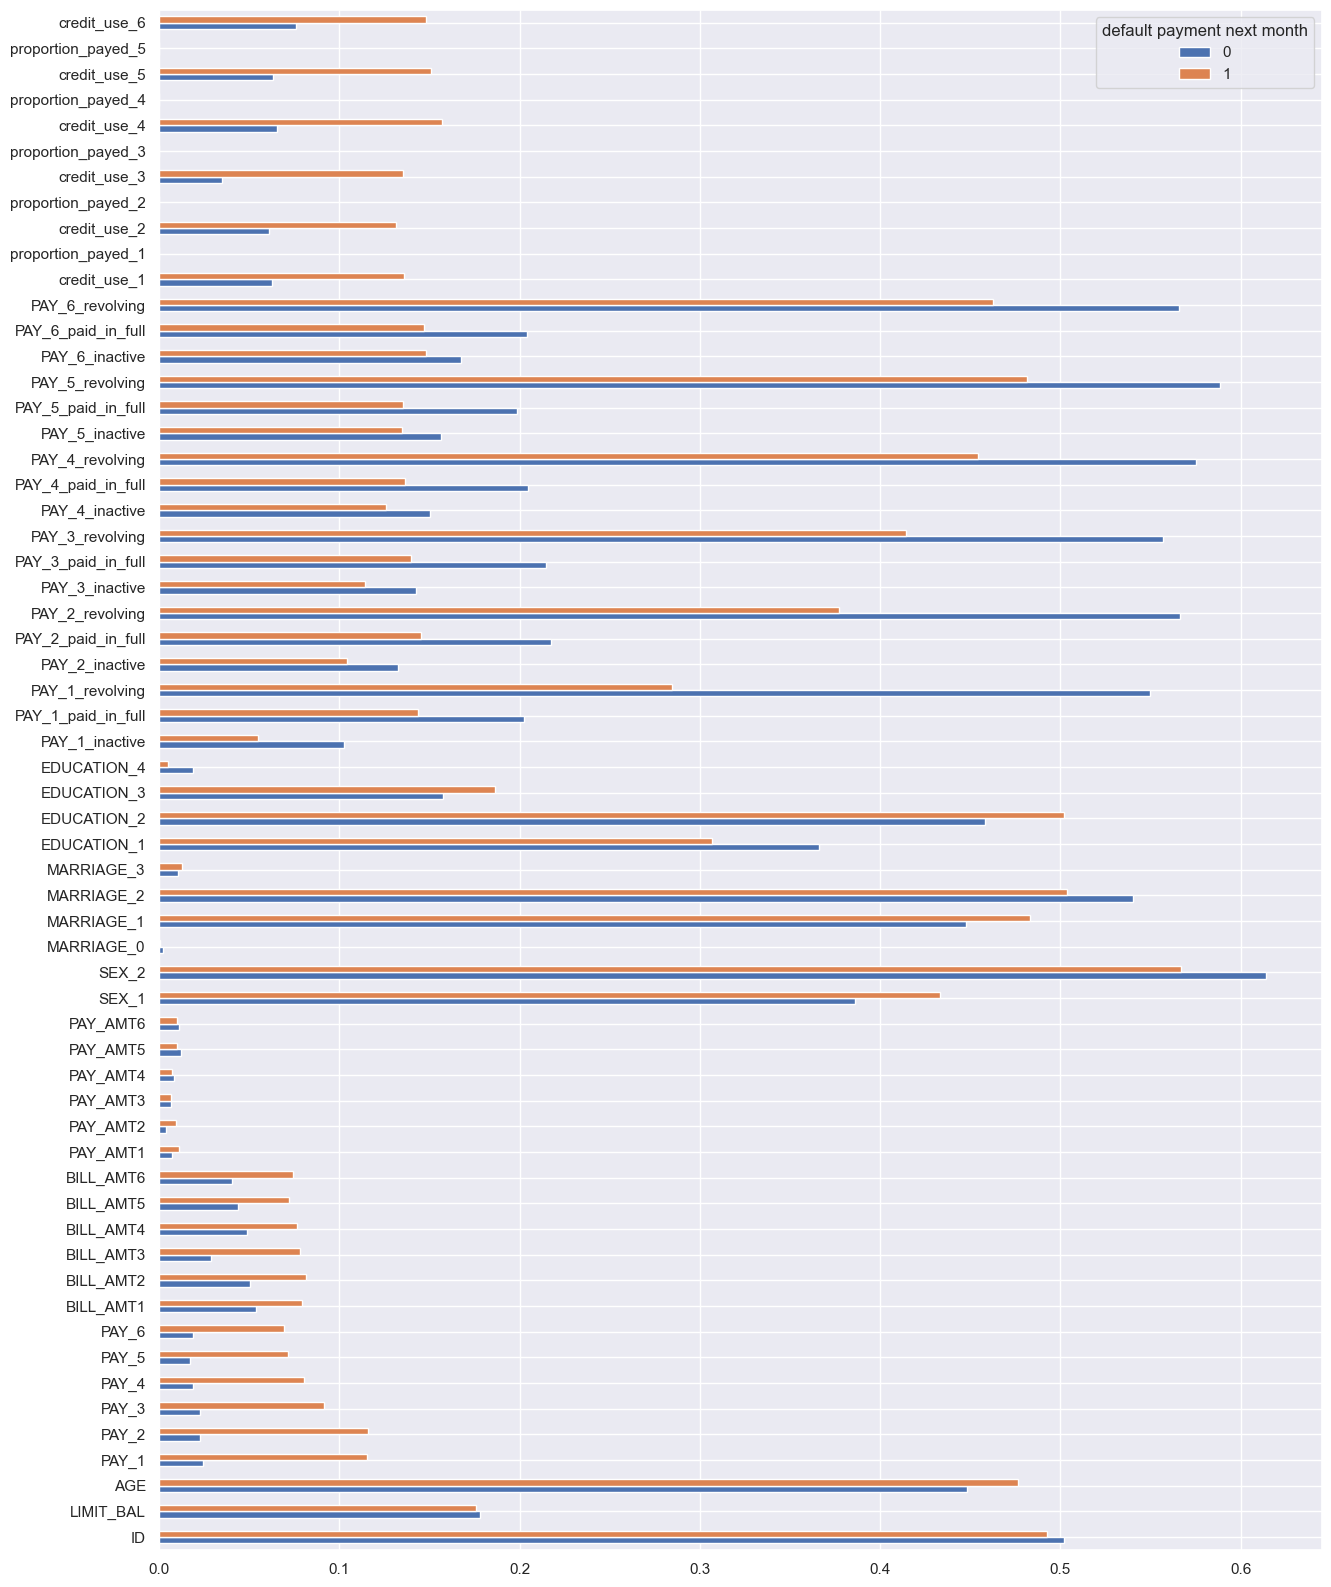

In [24]:
sns.set(rc={"figure.figsize":( 15,20)})
df =data.groupby(by = "default payment next month").mean()/data.groupby(by = "default payment next month").max()
df.transpose().plot.barh()


In the nextplot, we see that even though the average "credit_use_1" values have different means, their distributions dont look to different. In the subsequent plot we consider the interaction between "credit_use_1" and "PAY_1". Note that "PAY_1" is takes value 0 frequently, in which case it collapses the values to 0. However, the interaction does significantly change the distributions so its probably something we want to consider for our model.

<Axes: xlabel='default payment next month', ylabel='credit_use_1'>

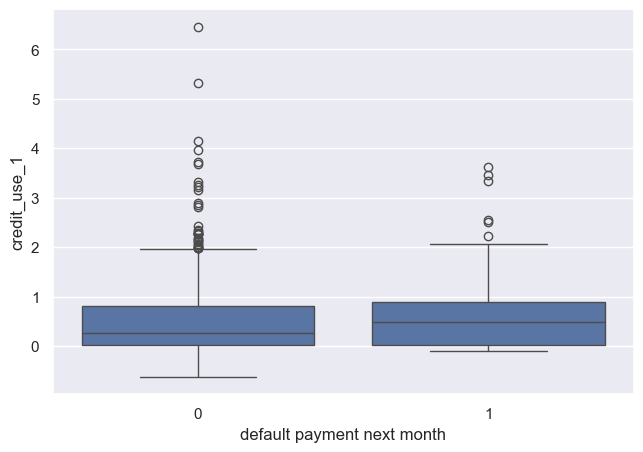

In [22]:
sns.set(rc={"figure.figsize":( 5*1.5,5)})
sns.boxplot(data=data,x = "default payment next month", y = data["credit_use_1"])

<Axes: xlabel='default payment next month', ylabel='None'>

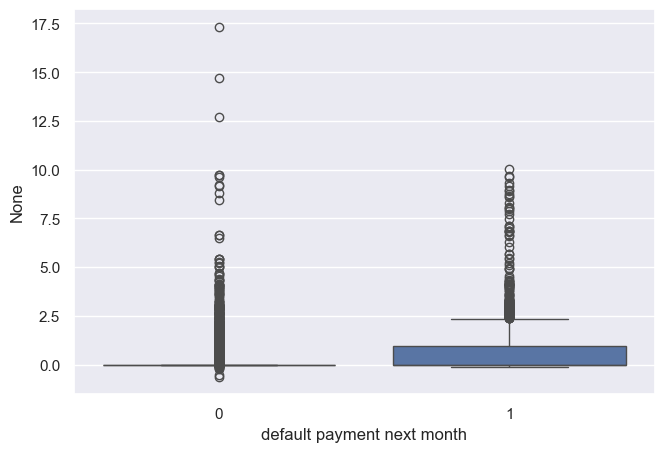

In [23]:
sns.boxplot(data=data,x = "default payment next month", y = data["PAY_1"]*data["credit_use_1"])